# Algebraic graph theory
Algebraic graph theory is concerned with the study of graphs through several related matrices.
We then need to understand how arrays are represented and can be manipulated with Python using the library NumPy.

## Array creation
You can create a numpy array from a Python list or tuple using the  `array ` function

In [53]:
import numpy as np
a = np.array([2,3,4])
print("a=", a)
print("Dimension of a:", a.shape)

a= [2 3 4]
Dimension of a: (3,)


 `array ` transforms lists of lists into two-dimensional arrays, i.e., matrices

In [54]:
b = np.array([[1.5,2,3], [4,5,6]])
print(b)
print("Dimension of b:", b.shape)

[[1.5 2.  3. ]
 [4.  5.  6. ]]
Dimension of b: (2, 3)


The function  `zeros ` creates an array full of zeros, the function  `ones ` creates an array full of ones

In [55]:
print(np.zeros((3, 4))) # tuple (3,4) is the shape of the zero array to be created
print(np.ones((2,3)))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


One can create arrays whose elements space in a given range using  `arange `

In [56]:
# the first two arguments are the starting point (included) and the ending point (excluded)
# the third argument is the step-size
np.arange(10, 30, 5) 

array([10, 15, 20, 25])

or using the function `linspace` that receives as an argument the number of elements that we want to obtain in the given range, instead of the step size

In [57]:
# the first two arguments are the starting and ending point (both included!), 
# third argument is the number of elements
np.linspace( 0, 2, 9 )

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

To summarize, numpy `ndarray` can represent arrays of any dimension but we will restrict to dimension 1 (vectors) and 2 (matrices). One-dimensional arrays are printed as rows, bidimensionals as matrices.

In [58]:
# np.arange(): default start value is 0, default step size is 1
a = np.arange(6)                         # 1d array
print("a:", a, "\n")
b = np.arange(12).reshape(4,3)           # 2d array
print("b: \n",b)

a: [0 1 2 3 4 5] 

b: 
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


## Basic operations
Arithmetic operators on arrays apply element-wise. A new array is created and filled with the result.

In [59]:
a = np.array([20,30,40,50])
print("a=",a)
# np.arange(): default start value is 0, default step size is 1, 
# so b = [0,1,2,3]
b = np.arange( 4 )
print("b=", b)
c = a-b
print("c= a-b =", c)
# ** denotes the second power ^2
print("b^2=", b**2) 
print("10 sin(a)=", 10*np.sin(a))
print("a<35:", a<35)

a= [20 30 40 50]
b= [0 1 2 3]
c= a-b = [20 29 38 47]
b^2= [0 1 4 9]
10 sin(a)= [ 9.12945251 -9.88031624  7.4511316  -2.62374854]
a<35: [ True  True False False]


The product operator `*` operates element-wise in NumPy arrays. 
The matrix product can be performed using the `@` operator or the `dot` function:

In [60]:
# Create two numpy arrays starting from lists of lists
A = np.array( [[1,1],   
               [0,1]] )
B = np.array( [[2,0],
               [3,4]] )
print("A*B= \n",A * B, "\n")                      # elementwise product
print("A@B= \n",A @ B, "\n")                      # matrix product
print("A.dot(B)=\n",A.dot(B))               # another matrix product

A*B= 
 [[2 0]
 [0 4]] 

A@B= 
 [[5 4]
 [3 4]] 

A.dot(B)=
 [[5 4]
 [3 4]]


NumPy provides familiar mathematical functions such as sin, cos, and exp. In NumPy, these are called “universal functions”(`ufunc`). Within NumPy, these functions operate elementwise on an array, producing an array as output.

In [61]:
B = np.arange(3) # B=[0,1,2]
np.exp(B)

array([1.        , 2.71828183, 7.3890561 ])

# Spectral graph theory
We will explore several notions from spectral graph theory by analysing the following graph:

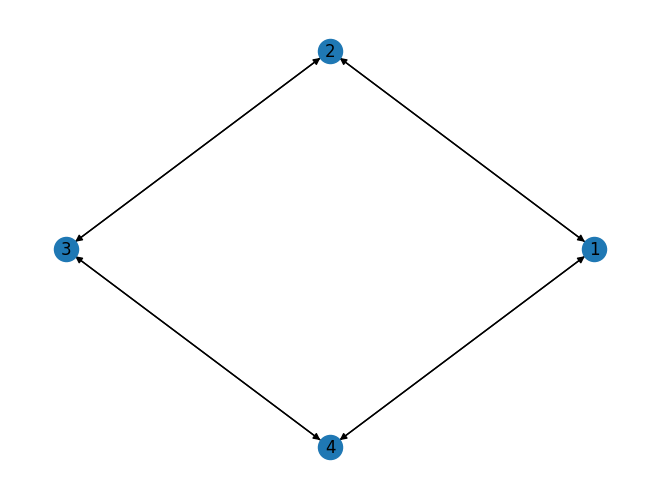

In [62]:
import networkx as nx

G = nx.DiGraph()
nx.add_cycle(G,[1,2,3,4])
nx.add_cycle(G,[4,3,2,1])

nx.draw_circular(G, with_labels=True)

First we construct the `weight matrix` $W$ (called also `adjacency matrix` in NetworkX), the diagonal matrix $D$, and the normalized adjacency matrix $P$

In [63]:
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
# convert W to a numpy array
W = W.toarray()
degrees = np.sum(W,axis=1)
print("Degrees:",degrees, "\n")
D = np.diag(degrees)
print("D: \n",D,"\n")
# P = D^(-1) W
P = np.linalg.inv(D) @ W
print("P: \n",P)

Degrees: [2 2 2 2] 

D: 
 [[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 2]] 

P: 
 [[0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]]


We compute the powers of the matrix $W$. Powers of $W$ have a useful interpretation in a unweighted (di)graphs, namely, $(W^n)_{ij}$ equals the number of walks of length $n$ from $i$ to $j$.

The interpretation can be extended to weighted graphs.

In [64]:
# Compute W^2
#power = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
power = W
# convert W to a numpy array
#power = power.toarray()
power = power @ W
print("W^2 =", power)

W^2 = [[2 0 2 0]
 [0 2 0 2]
 [2 0 2 0]
 [0 2 0 2]]


In [65]:
# Compute W^3
power = power @ W
print("W^3 =", power)

# Note that we compute P^3 by using P^2 to save computational time

W^3 = [[0 4 0 4]
 [4 0 4 0]
 [0 4 0 4]
 [4 0 4 0]]


In [66]:
# Compute W^10
for n in range(3,10):
    power = power @ W
print("W^10 =", power)

W^10 = [[512   0 512   0]
 [  0 512   0 512]
 [512   0 512   0]
 [  0 512   0 512]]


The powers of $W$ still contain zero elements. Why?

The reason is that the graph $G$ is periodic, as can be easily verified. There are no closed walks of odd length.

In [67]:
print("Is G aperiodic:",nx.is_aperiodic(G))

Is G aperiodic: False


Let us modify the graph to make it aperiodic, and compute again the powers of $W$.

Is G2 aperiodic: True


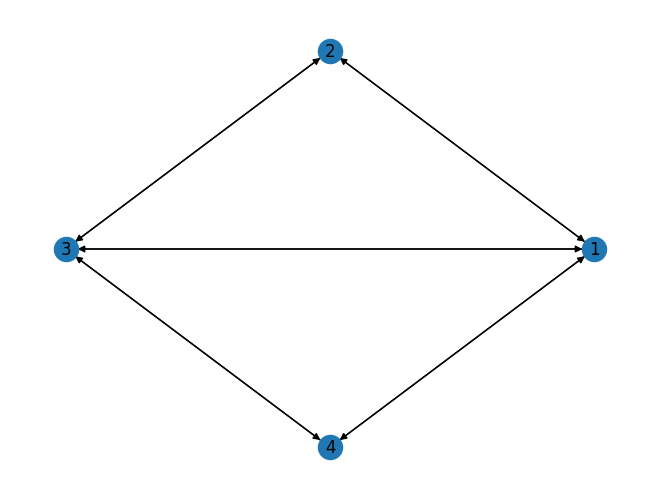

In [68]:
G2 = nx.DiGraph()
G2.add_nodes_from(range(1,3))
nx.add_cycle(G2,[1,2,3,4])
nx.add_cycle(G2,[4,3,2,1])
G2.add_edge(1,3)
G2.add_edge(3,1)

print("Is G2 aperiodic:",nx.is_aperiodic(G2))

nx.draw_circular(G2, with_labels=True)

In [69]:
W2 = nx.adjacency_matrix(G2)
W2 = W2.toarray()

degrees = np.sum(W2,axis=1)
print("Degrees",degrees, "\n")

D2 = np.diag(degrees)
print("D2: \n",D2,"\n")

P2 = np.linalg.inv(D2) @ W2
print("P2: \n",P2,"\n")

Degrees [3 2 3 2] 

D2: 
 [[3 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 2]] 

P2: 
 [[0.         0.33333333 0.33333333 0.33333333]
 [0.5        0.         0.5        0.        ]
 [0.33333333 0.33333333 0.         0.33333333]
 [0.5        0.         0.5        0.        ]] 



**Question**: what is the smallest power of $W$ that does not have null elements?

**Hint**: exploit the fact that in unweighted (di)graphs $(W^n)_{ij}$ is the number of walks between $i$ and $j$.

In [70]:
N = G2.number_of_nodes()
index = 1

power = W2

while nx.is_aperiodic(G2):
    if np.count_nonzero(power) == N*N:
        print("The smallest power of W with all non-zero elements is:", index)
        break
    else:
        index += 1
        power = power @ W2
        
print(power)

The smallest power of W with all non-zero elements is: 2
[[3 1 2 1]
 [1 2 1 2]
 [2 1 3 1]
 [1 2 1 2]]


We can also observe that $G$ is bipartite, while $G_2$ is not. To this end, we exploit the notion of **coloring**.

A coloring is a function $\phi$ that assigns to every node $n$ a color $\phi(n)$ with the properties that for every pair of adjacent nodes $\{n,m\}$, then $\phi(n) != \phi(m)$
 
**Theorem**: a graph is bipartite if and only if there exists a 2-coloring (coloring with 2 colors) defined on the graph.

['red', 'blue', 'red', 'blue']


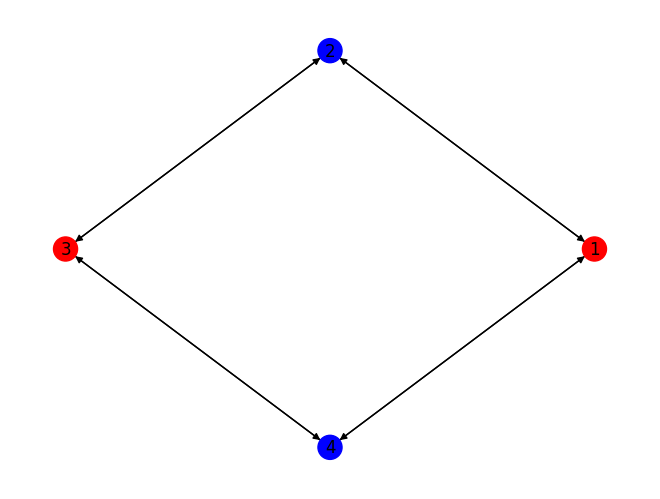

In [71]:
# We construct a coloring for the graph G
color_map = []

for node in range(G.number_of_nodes()):
    if node % 2 == 1:
        color_map.append('blue')
    else: 
        color_map.append('red')
        
print(color_map)

nx.draw_circular(G, node_color=color_map, with_labels=True)

Since $G$ admits a coloring, $G$ is bipartite.
Note that a 2-coloring for $G_2$ does not exist, thus $G_2$ is not bipartite. Another way to see this, is by the following theorems.

**Theorem 1**: an undirected graph is bipartite if and only if all circuits have even length.

We can also leverage algebraic graph theory. The following result is a consequence of Perron-Frobenius theorem.

**Theorem 2**: if a graph is bipartite, then the spectrum of its normalized adjacency matrix $P$ contains $-1$

In [72]:
# eig(P) returns the eigenvalues (in vector w)
# and eigenvectors (in matrix v) of P

w,v = np.linalg.eig(P)
print("spectrum of P:",w)

w,v = np.linalg.eig(P2)
print("spectrum of P2:",w)

spectrum of P: [-1.00000000e+00  3.29868511e-17  1.00000000e+00  0.00000000e+00]
spectrum of P2: [ 1.00000000e+00 -3.33333333e-01 -6.66666667e-01  1.35729354e-17]


Theorem 1 states that $G$ is bipartite and $G_2$ is not. Theorem 2 only states that $G_2$ is not bipartite.

The trace of the n-th power of $W$ equals the number of circuits with length $n$ in the graph ($n\ge2$).

**Question**: what is the trace of $W^3$?

To answer the question, let us plot again $G$

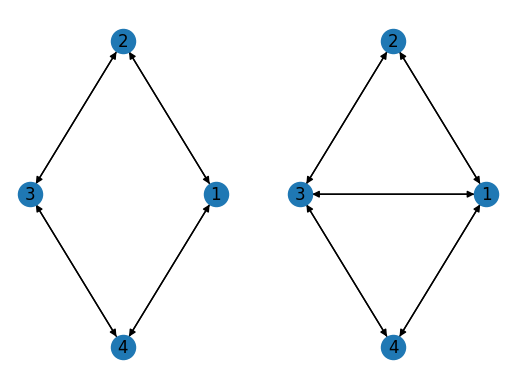

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(121)
nx.draw_circular(G, with_labels=True)

plt.subplot(122)
nx.draw_circular(G2, with_labels=True)

In [74]:
print("Number of length-3 circuits in G:", np.matrix.trace(W@W@W))
print("Number of length-3 circuits in G2:", np.matrix.trace(W2@W2@W2))

Number of length-3 circuits in G: 0
Number of length-3 circuits in G2: 12


We now define a new graph.

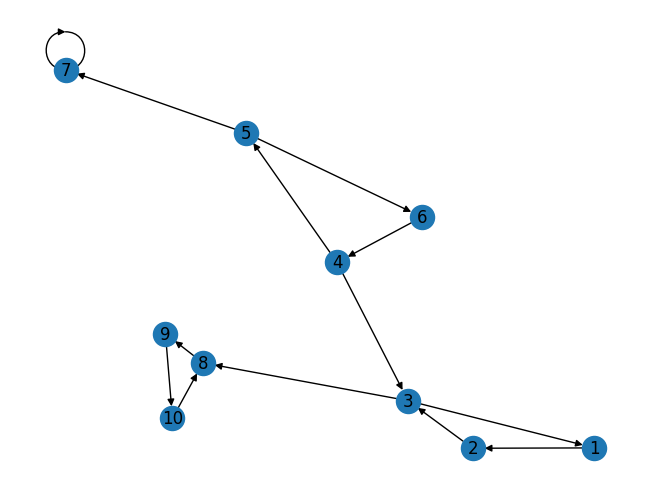

In [116]:
G = nx.DiGraph()
G.add_nodes_from(range(1,11))
nx.add_cycle(G,[1,2,3])
nx.add_cycle(G,[4,5,6])
nx.add_cycle(G,[8,9,10])
G.add_edges_from([(4,3), (3,8), (5,7), (7,7)])

# define pos according to spring layout
# to fix nodes' positions in all graph drawings.
# spring_layout positions nodes using Fruchterman-Reingold force-directed algorithm.
pos = nx.spring_layout(G)
nx.draw(G,pos, with_labels=True)

## Invariant probability distributions
In this section we show how to compute the invariant distributions of a graph.

**Definition**: an `invariant distribution` $\pi$ of a graph is a normalized eigenvector of $P'$ relative to eigenvalue $1$, i.e.,

$$
P' \pi = \pi, \quad \sum_i \pi_i = 1
$$ 
To do this, we first compute all eigenvalues and eigenvectors of $P'$ with function `np.linalg.eig()`:

In [76]:
W = nx.adjacency_matrix(G)
W = W.toarray()
degrees = np.sum(W,axis=1)
print("Degrees:",degrees,"\n")
D = np.diag(degrees)
print("D: \n",D,"\n")
# P = D^(-1) W
P = np.linalg.inv(D) @ W
print("P: \n",P)

Degrees: [1 1 2 2 2 1 1 1 1 1] 

D: 
 [[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]] 

P: 
 [[0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  0.5 0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]]


**Theorem**: if the graph is strongly connected, the eigenvalue 1 has multeplicity 1 (only one invariant distribution)

We compute the condensation graph of $G$

{0: {'members': {8, 9, 10}}, 1: {'members': {1, 2, 3}}, 2: {'members': {7}}, 3: {'members': {4, 5, 6}}}


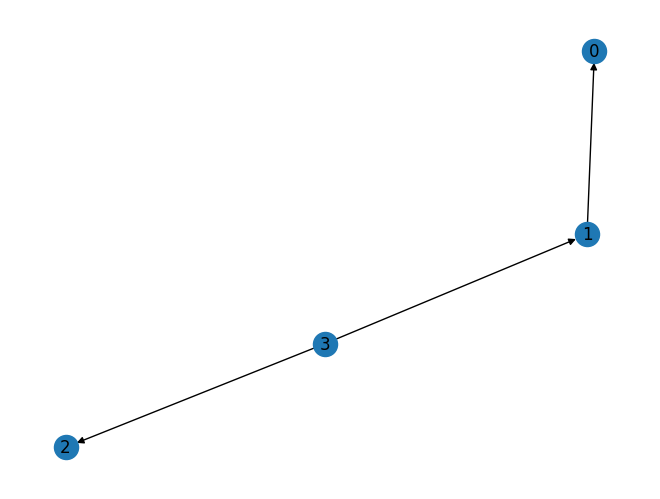

In [77]:
CG = nx.algorithms.components.condensation(G)
nx.draw(CG, with_labels=True)

print(dict(CG.nodes))

The graph is not strongly connected, since the condensation graph has more than one node. 

To confirm this, we compute the spectrum of $P$, and show that the eigenvalue 1 has algebraic multeplicity greater than 1.

**Remark**: multeplicity 1 of eigenvalue 1 does not imply strong connectedness of the graph.

In [78]:
# eig(P.T) returns the eigenvalues (in vector w)
# and eigenvectors (in matrix v) of P'
w,v = np.linalg.eig(P.T)
print("eigenvalues:",w) # -> the 0th and 5th eigenvalues are 1

eigenvalues: [ 1.        +0.j         -0.5       +0.8660254j  -0.5       -0.8660254j
 -0.39685026+0.68736482j -0.39685026-0.68736482j  1.        +0.j
  0.79370053+0.j         -0.31498026+0.54556182j -0.31498026-0.54556182j
  0.62996052+0.j        ]


There are two eigenvalues equal to 1 (in position 0 and 5 of `w`). We select the eigenvectors corresponding to the two occurrencies of eigenvalue 1 and we normalize them to obtain the two invariant distributions (`pi0` and `pi5`):

In [79]:
# we iterate over indices corresponding to eigenvalues 1
# i.e. corresponding to entries of w that are equal 1:
# for each index we extract the corresponding eigenvector in v
# and normalize it

# we use np.isclose() to compare eigenvalues to 1 to avoid
# numerical precision errors
for index in [i for i in range(len(G)) if np.isclose(w[i],1)]: 
    pi = v[:,index].real  # -> eigenvectors are complex but invariant distributions are real, so we convert pi to real
    pi = pi/np.sum(pi) # normalization
    print("pi", index, "=", pi)

pi 0 = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
pi 5 = [-4.09748830e-16 -5.87043997e-16 -3.78229689e-16 -6.84485708e-17
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  3.33333333e-01
  3.33333333e-01  3.33333333e-01]


**Theorem**: the multeplicity of the eigenvalue 1 equals the number of trapping sets of the graph. Moreover, for every trapping set, there exists a dominant eigenvector (called extremal) whose support is exactly the node set of the trapping set.

**Exercise**: Compute the extremal eigenvectors of G.

1. Find the attractive components of G
2. For each attractive component, construct the corresponding induced subgraph
3. Compute the P matrix of each induced subgraph and its invariant measure
4. Map the obtained measures back to the original graph G (by adding zeros in the appropriate positions)

**Hint**: use the methods introduced in the previous notebook, and the code above.

In [80]:
# TO DO

Up to now we have exploited the function `numpy.linalg.eig` to compute all the eigenvalues and eigenvectors of P', and we have selected the leading ones. 

Another approach consists in applying an iterative method which converges to the leading eigenvector. This will be illustrated in the following weeks.

# Network centralities

Node centralities measure the importance of the nodes of the network. Several notions of centrality may be defined, e.g.:

**Degree centrality**: the centrality of a node is proportional to its degree. In digraphs, we can define both the indegree and the outdegree centrality. For instance, the indegree centrality is a measure of importance in Twitter network, since it measures the number of followers of every account.

**Eigenvector centrality**: the eigenvector centrality generalizes the degree centrality. Instead of counting the number of neighbors as the degree centrality does, this centrality gives more importance to connections with more central nodes. Let $z$ denote the centrality. Thus,

$$
z_i \propto \sum_{j} W_{ji}z_j
$$

By normalizing $z$, and taking the proportionality factor equal to dominant eigenvalue $\lambda_W$, we obtain $\lambda_W z = W'z$, i.e., $z$ is the dominant eigenvector of $W$, and has non-negative components because of Perron-Frobenius theorem.

## Small networks Example: Zachary's Karate Club
Zachary's Karate Club network is a well-know network example. This is a quite small network so we can compute centralities directly. To better understand the meaning of centrality measure it is useful to visualize them by producing appropriate graph representations.

Let's first load and visualize Zachary's Karate Club network:

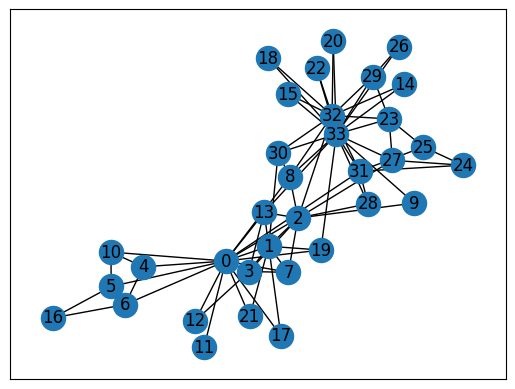

In [81]:
G = nx.karate_club_graph()

# Fix node positions on all pictures according to spring layout
pos = nx.spring_layout(G) 
nx.draw_networkx(G, pos)

# Visualizing centralities on graphs
We can compute centralities both using NetworkX algorithms and performing iterative procedures. It is important to make sense of the centrality vectors, and a useful way to do this is by visualizing centralities on graphs.

Compute, for example, the degree centrality of $G$. The following code shows how to represent $G$ so that nodes size and color reflects their centrality value:

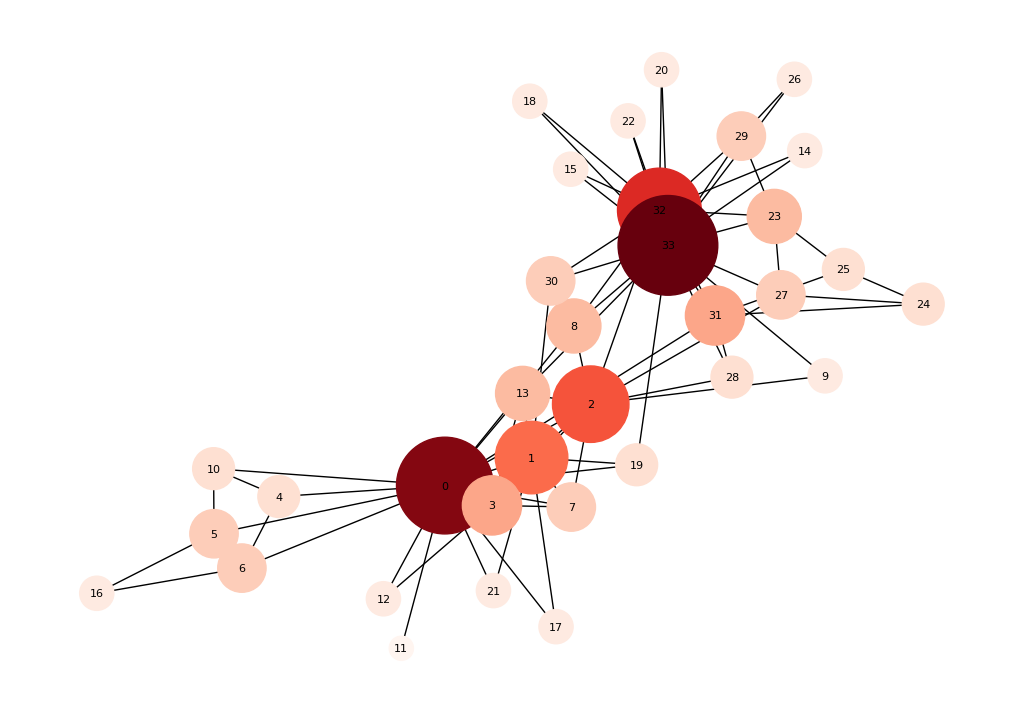

In [82]:
# Degree centrality

# dc is a dictionary with nodes as keys and degree centralities as values
dc = nx.degree_centrality(G) 
plt.figure(1, figsize=(10,7))
# we draw the graph with same node position "pos" defined above
nx.draw(G,pos,
         with_labels=True,
         # keys of dc are nodes
         nodelist=dc.keys(), 
         # node size is proportional to centrality value
         node_size = [d*10000 for d in dc.values()], 
         # node's color reflects centrality values (higher dc = darker color)
         node_color=list(dc.values()),
         font_size=8,
         # node's colors are on the red scale
         cmap=plt.cm.Reds) 

We repeat this procedure with a different measure, eigenvector centrality:

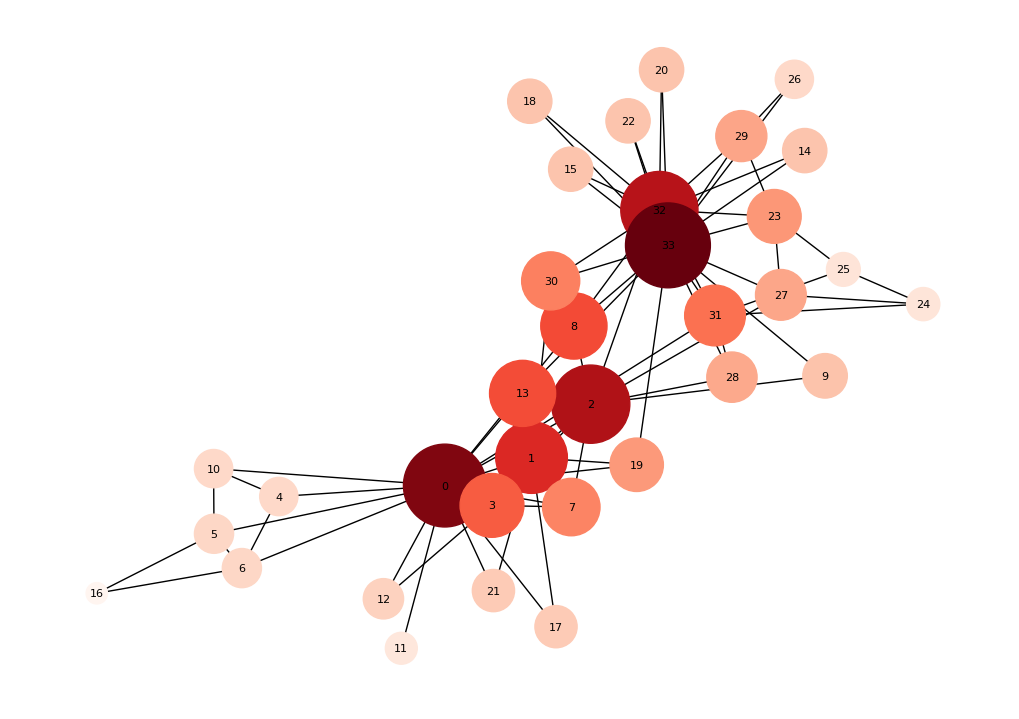

In [83]:
# Eigenvector centrality
ec = nx.eigenvector_centrality(G)
plt.figure(1, figsize=(10,7))
nx.draw(G, pos,
          with_labels=True,
          nodelist=ec.keys(),
          # node size is proportional to eigenvector centrality
          node_size = [d*10000 for d in ec.values()],  
          node_color=list(ec.values()),
          font_size=8,
          cmap=plt.cm.Reds,
          )

It is interesting to compare different centrality measures for the same graph and see how they are correlated. Below we visualize the correlation between degree centrality and eigenvector centrality of G:

Text(0, 0.5, 'Eigenvector Centrality')

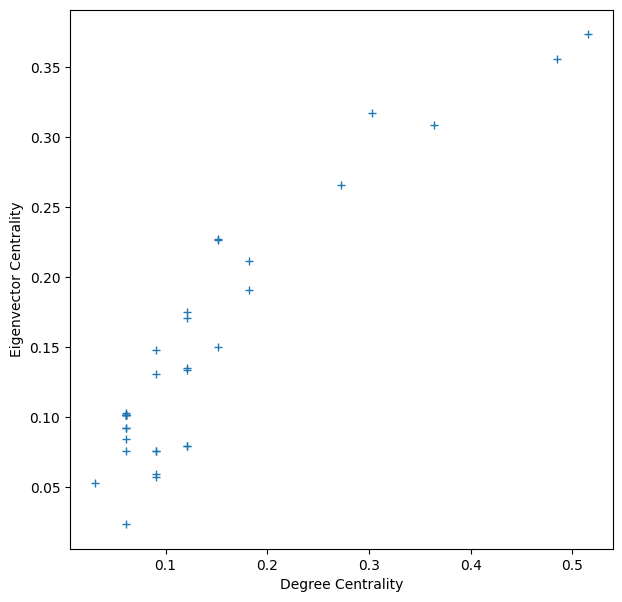

In [84]:
# Correlation degree-eigenvector

# x corresponds to degree centrality values
xdata = list(dc.values()) 
# y corresponds to eigenvector centrality values
ydata = list(ec.values()) 

plt.figure(1, figsize=(7,7))
# for each node, we plot an "+" with coordinates equal to the values of its
# degree and eigenvector centrality
plt.plot(xdata,ydata, '+') 
plt.xlabel('Degree Centrality')
plt.ylabel('Eigenvector Centrality')

The two centralities appear to be correlated for G. To explore this in more details it is useful to add node ids, so that we can see which are the nodes with higher or lower correlation.

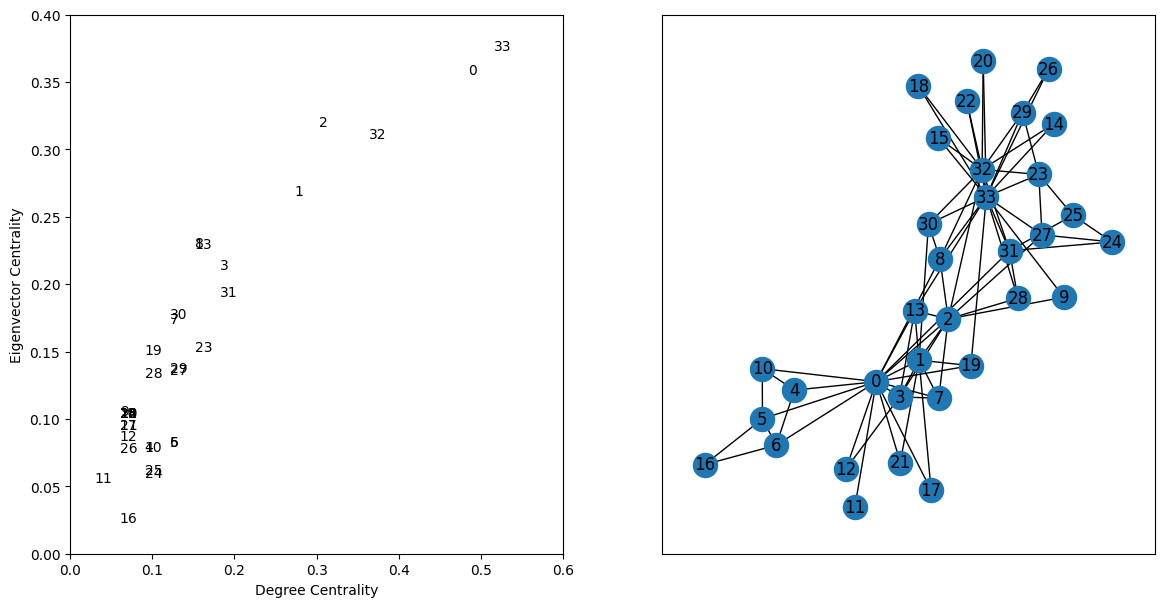

In [85]:
# Adding node ids:

# We define a figure and we construct two subplots: 
# on the left we plot the centralities correlation diagram
# with node labels, on the right we draw the graph 
# with same node labels
fig = plt.figure(1, figsize=(14,7))
# add_subplot() returns the axes of the subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for v in range(len(G)):
    # Axes.text(x,y,s) add the text s to Axes instance (i.e., to the subplot)
    # at location x, y. For each node v we plot 
    # node ids in position (xdata[v], ydata[v]) where xdata = list(dc.values())
    # and ydata = list(ec.values())
    ax1.text(x = xdata[v], y = ydata[v], s=str(v))
# we set the limits for x and y scales

ax1.set_xlim(0, 0.6)
ax1.set_ylim(0, 0.4)
ax1.set_xlabel('Degree Centrality')
ax1.set_ylabel('Eigenvector Centrality')

nx.draw_networkx(G, pos, ax=ax2)

Observe that node 11 has degree 1, while node 16 has degree 2, so $dc(16)>dc(11)$.

However, node 11 is connected to node 0, which has a large value of eigenvector centrality, while node 16 is connected to nodes 5 and 6, which have smaller values of centrality. Thus, $ec(16)<ec(11)$.

**Invariant distribution centrality**: it generalizes the eigenvector centrality by taking into account that being connected to nodes that connect to many nodes is less important than being connected to nodes that connect with a few nodes.

$$
z = P'z
$$

**Katz centrality**: it generalizes the eigenvector centrality by assuming that nodes have also an intrinsic centrality. The centrality is the sum of the intrinsic centrality and the centrality given by the network.

$$
z =  \frac{1-\beta}{\lambda_W} W' z + \beta \mu\,, \quad \beta \in [0,1].
$$

If $\beta = 0$, it is the eigenvector centrality. If $\beta = 1$, then $z=\mu$.

**Bonacich centrality (or Page-rank)**: it generalizes the invariant distribution centrality by assuming that nodes have also an intrinsic centrality. The centrality is the sum of the intrinsic centrality and the centrality given by the network.
$$ 
x = (1-\beta)P' x + \beta \mu\,, \quad \beta \in [0,1].
$$

If $\beta = 0$, it is the invariant distribution centrality. If $\beta = 1$, then $x=\mu$.

There are two ways to compute Katz and Bonacich centralities: **direct** and **iterative**.
We start by computing those centralities by direct methods for the Zachary's karate club graph.

## Direct method (for didactic purposes)
Direct methods consist in inverting the equation above and computing directly the centrality. Notice that

1. the Katz centrality 
$ z =  (\mathbf{I}-\frac{1-\beta}{\lambda_W} W')^{-1} \beta \mu $

2. and Bonacich centrality 
$ z = (\mathbf{I}-(1-\beta)P')^{-1} \beta \mu $

Note that the inversion can be done (if $\beta > 0$) because the matrices $\frac{1-\beta}{\lambda_W} W'$ and $(1-\beta)P'$ have spectral radius less than 1


In [86]:
# compute matrices of the graph
W = nx.adjacency_matrix(G)
W = W.toarray()
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

In [87]:
N = G.number_of_nodes() 
beta = 0.15
mu = np.ones((N,1))
# note that the normalization of mu does not influence z, if we consider normalized centralities

# compute the largest eigenvalue of W (which is real because of Perron-Frobenius theorem)
w,v = np.linalg.eig(W)
w = w.real

lambda_max = max(w) 
zk = np.linalg.inv(np.diag(np.ones(N)) - W.T*(1-beta)/lambda_max) * beta @ mu
# normalize the centrality
zk = zk/sum(zk)

print(zk)

[[0.0608948 ]
 [0.05546939]
 [0.06496818]
 [0.03850652]
 [0.0168794 ]
 [0.02055243]
 [0.0201355 ]
 [0.03450144]
 [0.0458356 ]
 [0.01430985]
 [0.01549385]
 [0.01347931]
 [0.01323357]
 [0.04468208]
 [0.01916793]
 [0.02461212]
 [0.01110341]
 [0.01326667]
 [0.01423168]
 [0.01816278]
 [0.01644584]
 [0.01544068]
 [0.0194219 ]
 [0.04323976]
 [0.01542241]
 [0.02758215]
 [0.01635447]
 [0.03089246]
 [0.02016484]
 [0.02928406]
 [0.03162734]
 [0.04221026]
 [0.06297368]
 [0.06945364]]


### Bonacich (Page-rank) centrality
Page-rank centrality is the Bonacich centrality with $\mu=\mathbf{1}$ and $\beta=0.15$.

In [88]:
zb = np.linalg.inv(np.diag(np.ones(N)) - P.T*(1-beta)) * beta @ mu
zb = zb/sum(zb)

# transform centralities to float
val = [];
for i in zb:
    val.append(float(i))

zb_list = val

# sometimes it is useful to store the centralities in a dictionary
# create a dictionary to collect the centralities, with nodes as keys and their centrality as values
zip_iterator = zip(G.nodes(), zb_list)
zb_dict = dict(zip_iterator)

print(zb_dict)

{0: 0.08850031542802166, 1: 0.057412319362886224, 2: 0.06276562384809001, 3: 0.0372100348179637, 4: 0.020500801080598343, 5: 0.033803873051631406, 6: 0.03152301896450631, 7: 0.02646320268602695, 8: 0.03338248346554683, 9: 0.009463494950839148, 10: 0.020685684694909192, 11: 0.009784998142583668, 12: 0.011474264117327649, 13: 0.0334729249654769, 14: 0.012942403848310474, 15: 0.016377443782028583, 16: 0.016752260138269477, 17: 0.009676695208227596, 18: 0.009545337709170468, 19: 0.013076990052964352, 20: 0.011224883881451419, 21: 0.011359470086105296, 22: 0.012961390745599526, 23: 0.041149758203041925, 24: 0.016635732755785157, 25: 0.028676448853554658, 26: 0.01524171740848012, 27: 0.02723772678970542, 28: 0.014479228223760632, 29: 0.028274666469245733, 30: 0.023032846090756953, 31: 0.041988177761964, 32: 0.07593441958077661, 33: 0.09698936283439373}


/tmp/ipykernel_10656/2806383746.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val.append(float(i))


## Compute centralities by networkX functions
The function `algorithms.link_analysis.pagerank_alg.pagerank` computes the Page-rank centrality of a given network

In [89]:
zb2_dict = nx.algorithms.link_analysis.pagerank_alg.pagerank(G)

# check if the centrality are normalized
zb2 = np.array(list(zb2_dict.values()))
print("Normalization:", sum(zb2), "\n")

# transform values to float
zb2_list = [];
for i in zb2:
    zb2_list.append(float(i))

Normalization: 1.0000000000000002 



Compare the Page-rank centrality computed by the inversion formula with the one computed by NetworkX

In [90]:
# for comparison, it is convenient to use centralities as arrays
# before comparing we ensure that the shape of the arrays is the same

print("Shape of zb:", zb.shape)
print("Shape of zb2", zb2.shape)

Shape of zb: (34, 1)
Shape of zb2 (34,)


In [91]:
# since it is not, we reshape zb
zb = zb.reshape(N)

# now we can compute the distance
print("Distance between zb and zb2:", np.linalg.norm(zb-zb2))

Distance between zb and zb2: 1.9705591784092655e-05


In [92]:
attr_components = tuple(nx.algorithms.components.attracting_components(G))

for c in attr_components:
    # construct the induced subgraph with nodes from the attractive component c
    sG = G.subgraph(c)
    # construct the matrix P on the subgraph
    W = nx.adjacency_matrix(sG)
    W = W.toarray()
    degrees = np.sum(W,axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ W
    # find the extremal dominant eigenvector corresponding to component c
    w,v = np.linalg.eig(P.T)
    for index in [i for i in range(len(sG)) if np.isclose(w[i],1)]: 
        pi = v[:,index].real  # -> eigenvectors are complex but pi is real, so we convert it to real
        pi = pi/np.sum(pi)
    # map pi back in the original node space
    pi_G = np.zeros(len(G))
    for i in range(len(sG)):
        pi_G[list(sG.nodes)[i]-1] = pi[i] # shift by -1 because nodes are (1,...10) while vector indexes are (0,...,9)
    print("pi:", pi_G, "\n")
    

NetworkXNotImplemented: not implemented for undirected type